# Expression de la fonction de réflexion

Petit notebook pour illustrer le calcul de la fonction de réflexion.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

### Dans le domaine fréquentiel

Text(0.5, 0.98, 'Fonction de réflexion, module et phase')

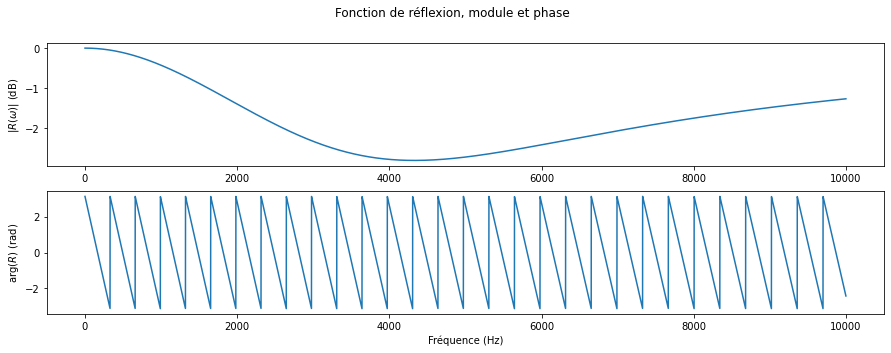

In [6]:
#milieux
rho0 = 1.225    # air density for T = 15°C (https://fr.wikipedia.org/wiki/Masse_volumique_de_l%27air)
c = 340     
mu = 18.5e-6 
#instrument (cylindre)
a=2.5e-2
S=np.pi*a**2

N=10000 #nbre d'échantillons
fe=20e3
te=1/fe
w=np.linspace(1,np.pi*fe, N)
k=w/c
l = 0.5
Zc=rho0*c/S
Zr = rho0 * c / S * (0.25*(k * a)**2 + 0.6133j * k*a) #cf code tp vent

# R=(Zc**(-1)-S*Zr**(-1))/(Zc**(-1)+S*Zr**(-1))
R = (Zr - Zc)/(Zr + Zc) * np.exp(-2j*k*l)

Rabs=np.abs(R)/np.max(np.abs(R))
fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(211)
ax.plot(w/(2*np.pi),10*np.log10(Rabs))
ax.set_ylabel(r"$|R(\omega)|$ (dB)")
ax=fig.add_subplot(212)
ax.plot(w/(2*np.pi),np.angle(R))
ax.set_ylabel(r"$\arg(R)$ (rad)")
ax.set_xlabel("Fréquence (Hz)")

fig.suptitle("Fonction de réflexion, module et phase")

### Et en temporel

Temps aller-retour :  0.0029411764705882353
Temps min :  0.003
Integrale totale :  -0.9999954027053384


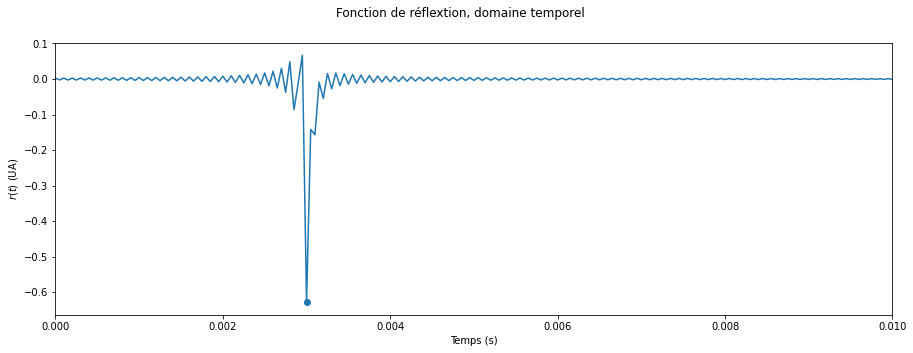

In [7]:
r=np.fft.irfft(R)
t=np.arange(r.size)*te

fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(t, r)
ax.set_ylabel(r"$r(t)$ (UA)")
ax.set_xlabel(r"Temps (s)")
fig.suptitle("Fonction de réflextion, domaine temporel")#Réponse impulsionnelle ?
ax.set_xlim([0, 0.01])
ax.scatter(np.argmin(r)*te, r[np.argmin(r)])
print("Temps aller-retour : ", 2*l/c)
print("Temps min : ", np.argmin(r)*te)
print("Integrale totale : ", np.sum(r))

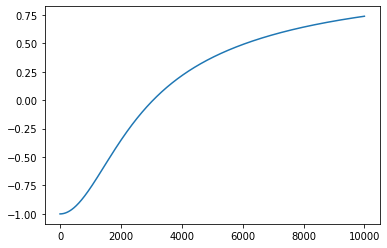

In [5]:
plt.plot(np.real(R))